In [113]:
import torch

In [114]:
X = torch.arange(12).reshape(4,3)
Y = torch.tensor([[1,2,3],[1,3,4],[3,2,1],[2,3,4]])
torch.cat((X,Y), dim=0) , torch.cat((X,Y), dim=1)

(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [ 1,  2,  3],
         [ 1,  3,  4],
         [ 3,  2,  1],
         [ 2,  3,  4]]),
 tensor([[ 0,  1,  2,  1,  2,  3],
         [ 3,  4,  5,  1,  3,  4],
         [ 6,  7,  8,  3,  2,  1],
         [ 9, 10, 11,  2,  3,  4]]))

In [11]:
!pip install d2l

  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


In [115]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [116]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [117]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.2495,  1.5920]) 
label: tensor([-0.6361])


In [118]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size) : 
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [16]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5275, -2.2864],
        [ 2.0870, -1.0010],
        [-0.2362,  0.9727],
        [ 0.8926, -1.0611],
        [-0.4153,  0.3994],
        [-0.4269,  0.3786],
        [ 0.4989, -2.7366],
        [ 1.7831, -0.2032],
        [ 0.9931, -0.5952],
        [-1.5913,  0.5366],
        [ 1.4993, -1.3241],
        [ 1.4001,  0.7893],
        [ 0.2795,  0.5202],
        [-0.6868, -1.0393],
        [-0.6829, -0.4614],
        [-0.2853,  0.2101],
        [ 0.2563,  0.6957],
        [ 1.8142,  0.9227],
        [-0.5542, -0.1048],
        [-1.4642,  1.5805]]) 
 tensor([[10.5129],
        [13.2621],
        [ 3.3513],
        [ 9.7712],
        [ 3.6547],
        [ 3.6483],
        [11.1131],
        [11.1555],
        [ 9.3648],
        [-0.0942],
        [11.9883],
        [ 8.5284],
        [ 5.5497],
        [ 4.9835],
        [ 4.1431],
        [ 4.3390],
        [ 5.2240],
        [ 9.5536],
        [ 3.9862],
        [-1.2682]])


In [119]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [120]:
def linreg(X, w, b): 
    return   torch.matmul(X, w) + b ###lr func 코드 완성하기

In [121]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return  (y_hat-y.reshape(y_hat.shape))** 2 / 2  ###loss function 직접 짜보기

In [122]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params : 
            param -= lr * param.grad / batch_size
            param.grad.zero_()
        
        
        ###반복문으로 채워넣기

In [123]:
lr = 0.001###직접 설정
num_epochs = 5 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b),y ) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 16.605745
epoch 2, loss 13.667266
epoch 3, loss 11.249011
epoch 4, loss 9.258849
epoch 5, loss 7.620981


In [124]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 1.8817, -0.9010], grad_fn=<SubBackward0>)
error in estimating b: tensor([3.3655], grad_fn=<RsubBackward1>)


In [130]:
def forward(x):
    return x*w

In [138]:
X[:,0]

tensor([-0.0771, -1.0995,  1.1266, -0.4814,  1.4826,  0.1177,  0.8120,  0.1961,
         0.3550, -0.3903,  1.2183, -1.7641, -0.6763,  0.4061, -0.3616,  0.9320,
        -1.3464,  0.3612, -0.1428, -1.0008])

In [148]:
x_data = X[:,0].detach().numpy()
y_data = y.detach().numpy()

In [141]:
def loss1(x,y):
    y_pred = forward(x)
    return (y_pred-y) * (y_pred - y)

w= 0.0
	 -0.07707605 [4.374619] -0.0 [19.137291]
	 -1.0995085 [3.4051216] -0.0 [11.594852]
	 1.1266049 [9.411769] 0.0 [88.58139]
	 -0.48136514 [4.423823] -0.0 [19.57021]
	 1.482594 [10.20848] 0.0 [104.21306]
	 0.11771954 [8.8699465] 0.0 [78.67595]
	 0.811973 [8.532853] 0.0 [72.809586]
	 0.19609642 [6.94073] 0.0 [48.173733]
	 0.35495645 [8.512239] 0.0 [72.45822]
	 -0.39028233 [2.1164262] -0.0 [4.47926]
	 1.2182971 [9.511956] 0.0 [90.47731]
	 -1.7641488 [-0.32083312] -0.0 [0.10293389]
	 -0.6762958 [5.43087] -0.0 [29.49435]
	 0.40613204 [7.2676573] 0.0 [52.818844]
	 -0.3615751 [5.820124] -0.0 [33.873844]
	 0.9320358 [6.3737836] 0.0 [40.62512]
	 -1.3463506 [-1.2928861] -0.0 [1.6715546]
	 0.3612029 [6.721285] 0.0 [45.17567]
	 -0.1428476 [4.0284667] -0.0 [16.228544]
	 -1.0007972 [0.8955536] -0.0 [0.80201626]
MSE= [276.98788]
w= 0.1
	 -0.07707605 [4.374619] -0.007707604765892029 [19.204786]
	 -1.0995085 [3.4051216] -0.10995085239410402 [12.355734]
	 1.1266049 [9.411769] 0.11266049146652223 [8

	 -1.0995085 [3.4051216] -2.528869605064392 [35.212254]
	 1.1266049 [9.411769] 2.591191303730011 [46.52028]
	 -0.48136514 [4.423823] -1.1071398317813874 [30.59155]
	 1.482594 [10.20848] 3.4099662303924565 [46.219784]
	 0.11771954 [8.8699465] 0.2707549385726452 [73.9461]
	 0.811973 [8.532853] 1.867537844181061 [44.426426]
	 0.19609642 [6.94073] 0.4510217666625977 [42.116314]
	 0.35495645 [8.512239] 0.8163998305797577 [59.225952]
	 -0.39028233 [2.1164262] -0.8976493656635286 [9.084651]
	 1.2182971 [9.511956] 2.8020833849906923 [45.022392]
	 -1.7641488 [-0.32083312] -4.057542312145234 [13.962995]
	 -0.6762958 [5.43087] -1.555480378866196 [48.809093]
	 0.40613204 [7.2676573] 0.934103697538376 [40.1139]
	 -0.3615751 [5.820124] -0.8316227227449418 [44.245735]
	 0.9320358 [6.3737836] 2.14368234872818 [17.893759]
	 -1.3463506 [-1.2928861] -3.096606266498566 [3.2534063]
	 0.3612029 [6.721285] 0.830766659975052 [34.698204]
	 -0.1428476 [4.0284667] -0.328549474477768 [18.98359]
	 -1.0007972 [0.89

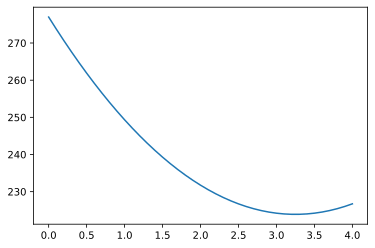

In [149]:
w_list= []
mse_list =[]
for w in np.arange(0.0,4.1,0.1):
    print("w=", w)
    l_sum = 0 
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss1(x_val, y_val)
        l_sum+= l
        print("\t", x_val, y_val, y_pred_val, l)
    print("MSE=", l_sum/ 3)
    w_list.append(w)
    mse_list.append(l_sum/ 3)

plt.plot(w_list, mse_list)
plt.show()

In [150]:
x_data2 = X[:,1].detach().numpy()
y_data2 = y.detach().numpy()

w= 0.0
	 0.58698046 [4.374619] 0.0 [19.137291]
	 -0.80545837 [3.4051216] -0.0 [11.594852]
	 -0.35982266 [9.411769] -0.0 [88.58139]
	 -0.24561465 [4.423823] -0.0 [19.57021]
	 -0.18763545 [10.20848] -0.0 [104.21306]
	 -2.0127673 [8.8699465] -0.0 [78.67595]
	 -0.4003525 [8.532853] -0.0 [72.809586]
	 -0.57775915 [6.94073] -0.0 [48.173733]
	 -1.2840549 [8.512239] -0.0 [72.45822]
	 1.4833121 [2.1164262] 0.0 [4.47926]
	 -0.23377807 [9.511956] -0.0 [90.47731]
	 0.3557513 [-0.32083312] 0.0 [0.10293389]
	 -1.3127298 [5.43087] -0.0 [29.49435]
	 -0.3668052 [7.2676573] -0.0 [52.818844]
	 -0.94067943 [5.820124] -0.0 [33.873844]
	 1.2866733 [6.3737836] 0.0 [40.62512]
	 1.829123 [-1.2928861] 0.0 [1.6715546]
	 -0.09278314 [6.721285] -0.0 [45.17567]
	 0.6838853 [4.0284667] 0.0 [16.228544]
	 1.0775096 [0.8955536] 0.0 [0.80201626]
MSE= [276.98788]
w= 0.1
	 0.58698046 [4.374619] 0.05869804620742798 [18.627172]
	 -0.80545837 [3.4051216] -0.08054583668708802 [12.149878]
	 -0.35982266 [9.411769] -0.0359822660

	 -1.2840549 [8.512239] -2.5681097507476807 [122.77413]
	 1.4833121 [2.1164262] 2.9666242599487305 [0.7228367]
	 -0.23377807 [9.511956] -0.4675561487674713 [99.59067]
	 0.3557513 [-0.32083312] 0.7115026116371155 [1.0657171]
	 -1.3127298 [5.43087] -2.625459671020508 [64.90445]
	 -0.3668052 [7.2676573] -0.7336103916168213 [64.02028]
	 -0.94067943 [5.820124] -1.8813588619232178 [59.312836]
	 1.2866733 [6.3737836] 2.5733466148376465 [14.443321]
	 1.829123 [-1.2928861] 3.6582460403442383 [24.513712]
	 -0.09278314 [6.721285] -0.1855662763118744 [47.704594]
	 0.6838853 [4.0284667] 1.3677705526351929 [7.0793033]
	 1.0775096 [0.8955536] 2.1550192832946777 [1.5862539]
MSE= [366.9667]
w= 2.1
	 0.58698046 [4.374619] 1.2326589703559876 [9.871914]
	 -0.80545837 [3.4051216] -1.6914625704288484 [25.975172]
	 -0.35982266 [9.411769] -0.7556275874376297 [103.37595]
	 -0.24561465 [4.423823] -0.5157907605171204 [24.399784]
	 -0.18763545 [10.20848] -0.3940344482660294 [112.41331]
	 -2.0127673 [8.8699465] -4

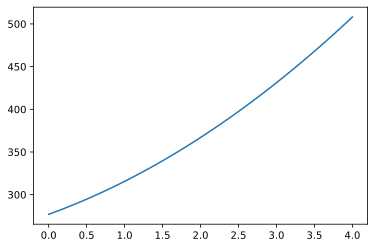

In [151]:
w_list= []
mse_list =[]
for w in np.arange(0.0,4.1,0.1):
    print("w=", w)
    l_sum = 0 
    for x_val, y_val in zip(x_data2, y_data2):
        y_pred_val = forward(x_val)
        l = loss1(x_val, y_val)
        l_sum+= l
        print("\t", x_val, y_val, y_pred_val, l)
    print("MSE=", l_sum/ 3)
    w_list.append(w)
    mse_list.append(l_sum/ 3)

plt.plot(w_list, mse_list)
plt.show()

In [31]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [32]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [33]:
next(iter(data_iter))

[tensor([[-0.6322, -0.5381],
         [ 0.9656, -0.2798],
         [ 1.4908, -0.0104],
         [ 0.7350,  0.2583],
         [ 0.9758,  0.1310],
         [ 0.7371,  0.2749],
         [-0.2560, -1.2464],
         [ 1.3336, -0.5621],
         [-1.4839,  0.2426],
         [-0.0344,  0.7077],
         [ 0.0244, -0.3661],
         [ 0.2543,  1.8490],
         [ 1.2593, -1.1189],
         [-1.2977,  0.1326],
         [ 0.5812, -0.9939],
         [-0.0358, -0.3507],
         [-0.4877,  1.8197],
         [-0.1249, -0.0303],
         [ 0.0595,  0.8528],
         [-0.0762,  0.0221]]),
 tensor([[ 4.4048],
         [ 8.8161],
         [10.0034],
         [ 7.3092],
         [ 8.2273],
         [ 7.2867],
         [ 6.5975],
         [10.3224],
         [ 0.6921],
         [ 4.3405],
         [ 6.1308],
         [ 3.4720],
         [10.9600],
         [ 1.3880],
         [ 8.7291],
         [ 5.9200],
         [ 1.3131],
         [ 5.1784],
         [ 4.4044],
         [ 5.2386]])]

In [34]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [35]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [37]:
loss = nn.MSELoss()###api function으로 직접 설정

In [38]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)###api function으로 직접 설정

In [39]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000332
epoch 2, loss 0.000106
epoch 3, loss 0.000106


In [40]:
w = net[0].weight.data ###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data ###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0003, -0.0006])
error in estimating b: tensor([0.0005])
